In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Reshape the data to add a channel dimension (needed for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Reshape the data to add a channel dimension (needed for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7168 - loss: 0.7773 - val_accuracy: 0.8476 - val_loss: 0.4173
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.8672 - loss: 0.3732 - val_accuracy: 0.8766 - val_loss: 0.3472
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.8861 - loss: 0.3232 - val_accuracy: 0.8855 - val_loss: 0.3105
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.8959 - loss: 0.2900 - val_accuracy: 0.8932 - val_loss: 0.2959
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9056 - loss: 0.2606 - val_accuracy: 0.8979 - val_loss: 0.2753
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9139 - loss: 0.2372 - val_accuracy: 0.9024 - val_loss: 0.2652
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9190 - loss: 0.2190 - val_accuracy: 0.8972 - val_loss: 0.2778
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9217 - loss: 0.2092 - 

In [13]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9043 - loss: 0.2758

Test Accuracy: 0.91


In [14]:
# Make predictions
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [15]:
# Show example predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

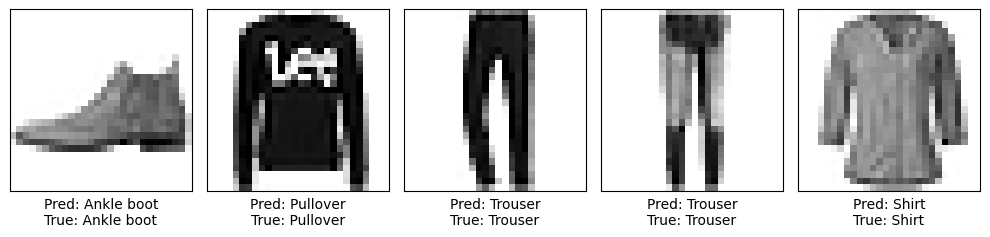

In [16]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
    pred_label = class_names[predictions[i].argmax()]
    true_label = class_names[y_test[i]]
    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}")
plt.tight_layout()
plt.show()